# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [89]:
# Requests
import requests
import json
import time
from pprint import pprint

# Data Science
import pandas as pd
import numpy as np
import scipy.stats as sc

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [90]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        if (response.status_code == 200):
            # Extract data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_name = city_weather.get("name")
            city_country = city_weather.get("sys", {}).get("country")
            city_date = city_weather.get("dt")
            city_humidity = city_weather.get("main", {}).get("humidity")
            city_max_temp = city_weather.get("main", {}).get("temp_max")
            city_pressure = city_weather.get("main", {}).get("pressure")
            city_clouds = city_weather.get("clouds", {}).get("all")
            city_windspeed = city_weather.get("wind", {}).get("speed")
    
            city_lat = city_weather.get("coord", {}).get("lat")
            city_lng = city_weather.get("coord", {}).get("lon")

            # Append the City information into city_data list
            city_data.append({"City": city_name,
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_windspeed,
                              "Pressure": city_pressure,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print(f"YO! The API threw a non-200 status code: {response['status_code']} for city {city}") # error log
            print()
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | tobelo
Processing Record 4 of Set 1 | turuntayevo
Processing Record 5 of Set 1 | anadyr
Processing Record 6 of Set 1 | grand falls-windsor
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | chekmagush
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | lihue
Processing Record 13 of Set 1 | vernon
Processing Record 14 of Set 1 | egilsstadir
Processing Record 15 of Set 1 | ixtapa
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | kenora
Processing Record 20 of Set 1 | udachny
Processing Record 21 of Set 1 | namibe
Processing Record 22 of Set 

In [55]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Pressure      579
Country       579
Date          579
dtype: int64

In [56]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
0,Yellowknife,62.4560,-114.3525,-12.48,77,75,5.75,1032,CA,1734400602
1,Ribeira Grande,38.5167,-28.7000,63.77,76,8,15.01,1012,PT,1734400645
2,Tobelo,1.7284,128.0095,85.55,70,95,2.98,1008,ID,1734400448
3,Turuntayevo,52.2000,107.6167,11.21,98,100,1.57,1046,RU,1734400648
4,Anadyr,64.7500,177.4833,19.90,73,100,17.90,1012,RU,1734400649


In [57]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [58]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
City_ID,,,,,,,,,,
0,Yellowknife,62.4560,-114.3525,-12.48,77,75,5.75,1032,CA,1734400602
1,Ribeira Grande,38.5167,-28.7000,63.77,76,8,15.01,1012,PT,1734400645
2,Tobelo,1.7284,128.0095,85.55,70,95,2.98,1008,ID,1734400448
3,Turuntayevo,52.2000,107.6167,11.21,98,100,1.57,1046,RU,1734400648
4,Anadyr,64.7500,177.4833,19.90,73,100,17.90,1012,RU,1734400649


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

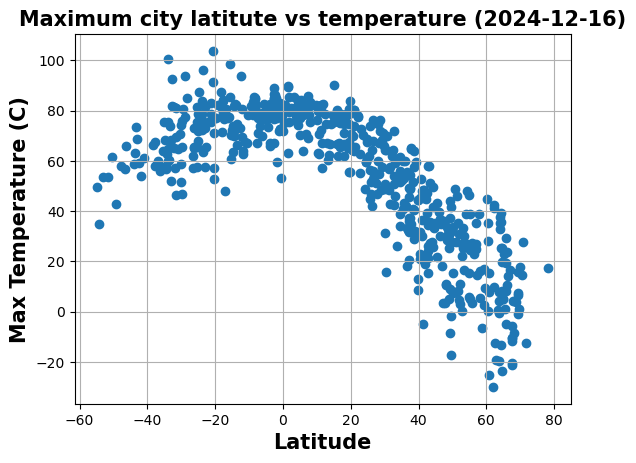

In [59]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])
plt.title("Maximum city latitute vs temperature (%s)" % time.strftime("%Y-%m-%d"),fontsize=15, fontweight="bold")
plt.xlabel("Latitude", fontsize=15, fontweight="bold")
plt.ylabel("Max Temperature (C)", fontsize=15, fontweight="bold")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

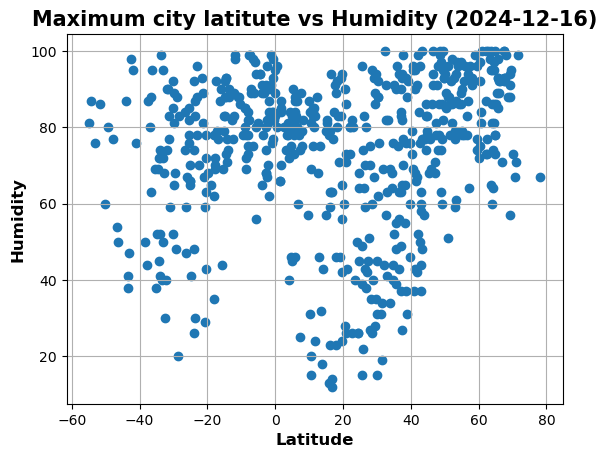

In [60]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])
plt.title("Maximum city latitute vs Humidity (%s)" % time.strftime("%Y-%m-%d"),fontsize=15, fontweight="bold")
plt.xlabel("Latitude", fontsize=12, fontweight="bold")
plt.ylabel("Humidity", fontsize=12, fontweight="bold")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Lat_Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

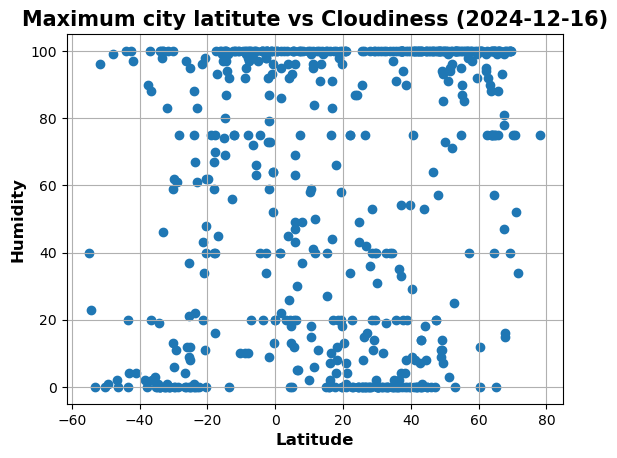

In [61]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])
plt.title("Maximum city latitute vs Cloudiness (%s)" % time.strftime("%Y-%m-%d"),fontsize=15, fontweight="bold")
plt.xlabel("Latitude", fontsize=12, fontweight="bold")
plt.ylabel("Humidity", fontsize=12, fontweight="bold")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

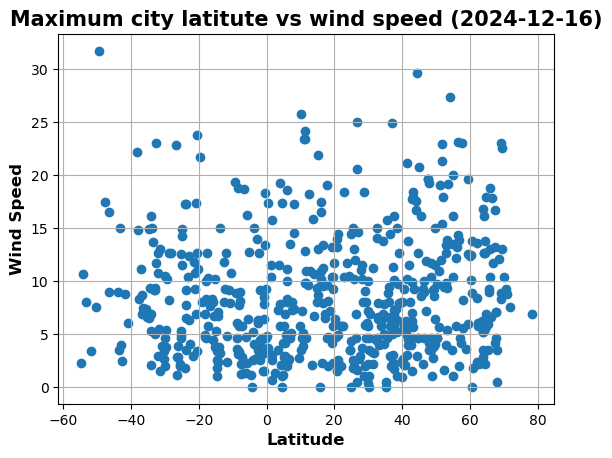

In [62]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])
plt.title("Maximum city latitute vs wind speed (%s)" % time.strftime("%Y-%m-%d"),fontsize=15, fontweight="bold")
plt.xlabel("Latitude", fontsize=12, fontweight="bold")
plt.ylabel("Wind Speed", fontsize=12, fontweight="bold")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat_windspeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [98]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=12,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs {title}")
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [99]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
City_ID,,,,,,,,,,
0,Yellowknife,62.4560,-114.3525,-12.48,77,75,5.75,1032,CA,1734400602
1,Ribeira Grande,38.5167,-28.7000,63.77,76,8,15.01,1012,PT,1734400645
2,Tobelo,1.7284,128.0095,85.55,70,95,2.98,1008,ID,1734400448
3,Turuntayevo,52.2000,107.6167,11.21,98,100,1.57,1046,RU,1734400648
4,Anadyr,64.7500,177.4833,19.90,73,100,17.90,1012,RU,1734400649


In [100]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Pressure,Country,Date
City_ID,,,,,,,,,,
6,Coquimbo,-29.9533,-71.3436,58.73,81,0,4.61,1014,CL,1734400532
7,Adamstown,-25.0660,-130.1015,72.07,70,8,14.88,1013,PN,1734400374
8,Punta Arenas,-53.1500,-70.9167,53.71,76,0,8.05,1008,CL,1734400653
10,Blackmans Bay,-43.0167,147.3167,68.74,47,4,4.00,999,AU,1734400655
16,Port-aux-Français,-49.3500,70.2167,42.69,80,1,31.70,989,TF,1734400663


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7679872075054132


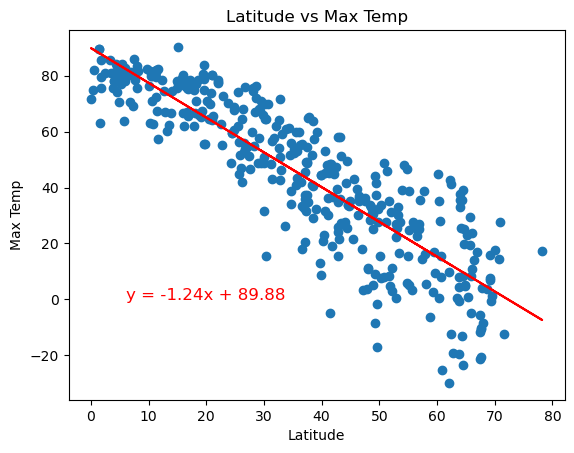

In [101]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, 0))

The r^2-value is: 0.25733581654454013


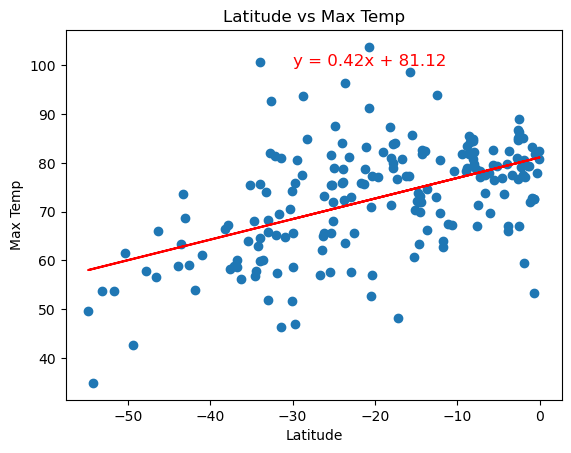

In [108]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-30, 100))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.11015888633442761


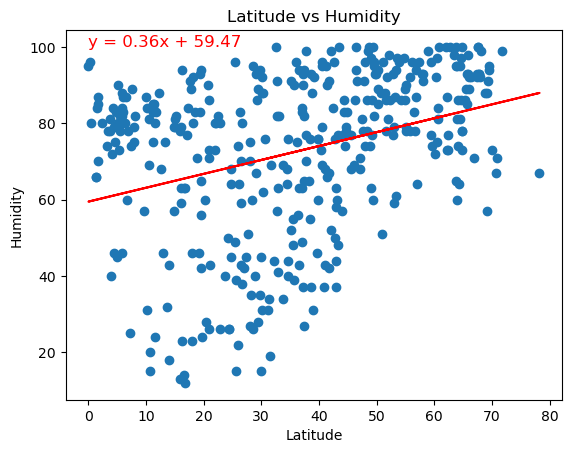

In [109]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (0,100))

The r^2-value is: 0.11833813404834159


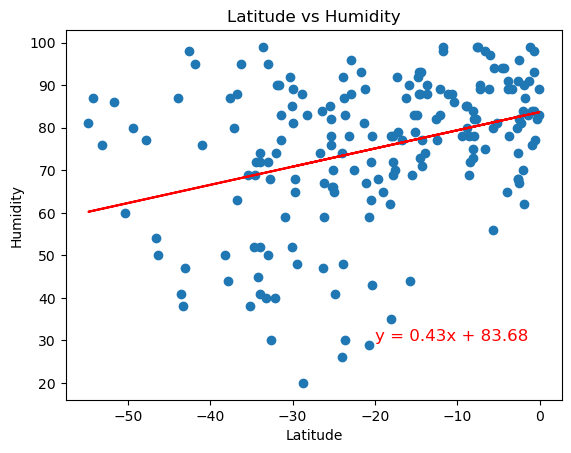

In [114]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-20,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.0684358037021688


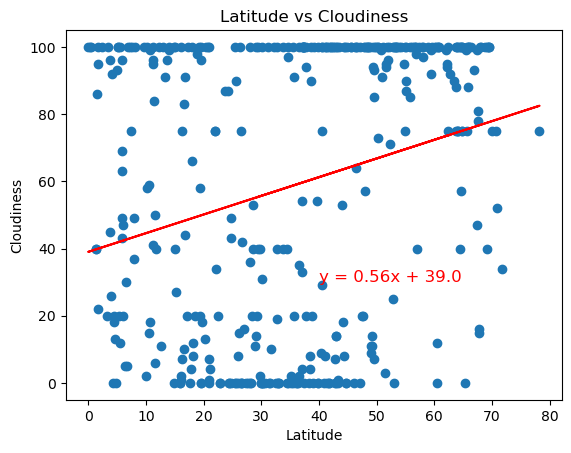

In [117]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (40,30))

The r^2-value is: 0.19632214566060643


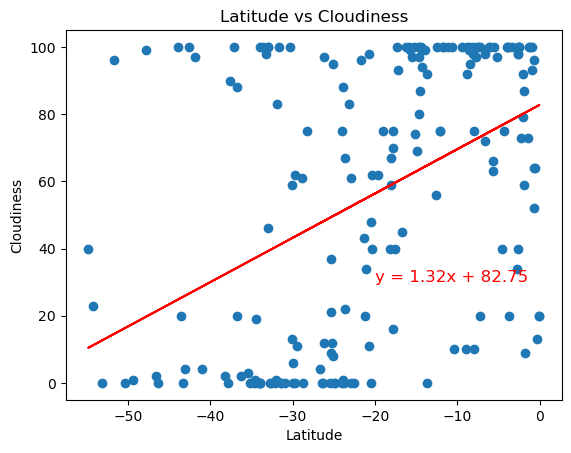

In [118]:
#Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-20,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.01039107910137002


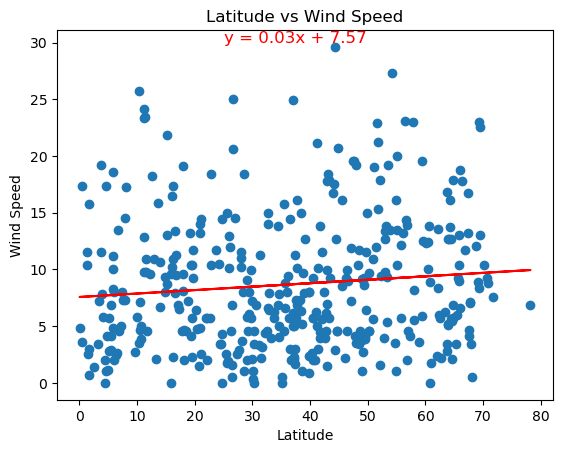

In [120]:
# Northern Hemisphere
x_values = northern_hemisphere_df["Lat"]
y_values = northern_hemisphere_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (25,30))

The r^2-value is: 0.05105366361047368


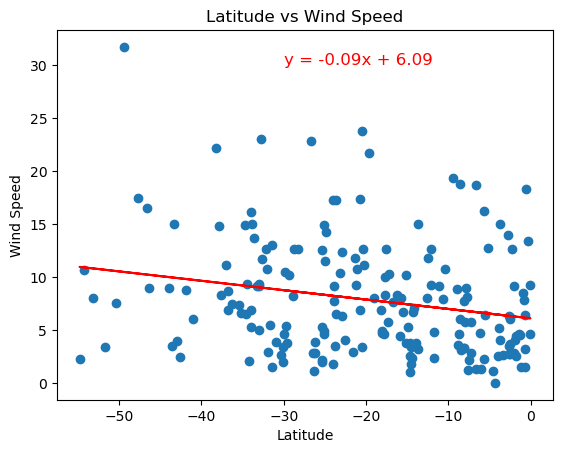

In [122]:
# Southern Hemisphere
x_values = southern_hemisphere_df["Lat"]
y_values = southern_hemisphere_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE